# A Transfer Learning and Optimized CNN Based Intrusion Detection System for Internet of Vehicles 
This is the code for the paper entitled "**A Transfer Learning and Optimized CNN Based Intrusion Detection System for Internet of Vehicles**" accepted in IEEE International Conference on Communications (IEEE ICC).  
Authors: Li Yang (lyang339@uwo.ca) and Abdallah Shami (Abdallah.Shami@uwo.ca)  
Organization: The Optimized Computing and Communications (OC2) Lab, ECE Department, Western University

**Notebook 1: Data pre-processing**  
Procedures:  
&nbsp; 1): Read the dataset  
&nbsp; 2): Transform the tabular data into images  
&nbsp; 3): Display the transformed images  
&nbsp; 4): Split the training and test set  

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

## Read the Car-Hacking/CAN-Intrusion dataset
The complete Car-Hacking dataset is publicly available at: https://ocslab.hksecurity.net/Datasets/CAN-intrusion-dataset  
In this repository, due to the file size limit of GitHub, we use the 5% subset.

In [2]:
#Read dataset
#Read dataset
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])
df = pd.read_csv('KDDTrain+.csv', header=None, index_col=False, names=columns)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [3]:
labelencoder = LabelEncoder()
for columns in df.dtypes[df.dtypes == 'object'].index:
    if columns != 'attack': df[columns] = labelencoder.fit_transform(df[columns])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
# Fix the typos in "attack_cat"
fix_dict = {
    'neptune':'Dos',
    'smurf':'Dos',
    'back':'Dos',
    'teardrop':'Dos',
    'pod':'Dos',
    'land':'Dos',
    'nmap':'Probe',
    'ipsweep':'Probe',
    'portsweep':'Probe',
    'satan':'Probe',
    'guess_passwd':'R2L',
    'warezclient':'R2L',
    'warezmaster':'R2L',
    'imap':'R2L',
    'ftp_write':'R2L',
    'multihop':'R2L',
    'phf':'R2L',
    'spy':'R2L',
    'buffer_overflow':'U2R',
    'rootkit':'U2R',
    'loadmodule':'U2R',
    'perl':'U2R',
}
# Replace the typos
df['attack'] = df['attack'].apply(lambda x: fix_dict[x] if x in fix_dict else x)
df['attack'].value_counts()

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: attack, dtype: int64

In [5]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={'R2L':8000, 'U2R':8000})

In [6]:
x, y = smote.fit_resample(df.drop(['attack'], axis=1), df['attack'])

In [7]:
x.insert(loc=len(x.columns), column='attack', value=y.values)
df = x

In [8]:
# The labels of the dataset. "R" indicates normal patterns, and there are four types of attack (DoS, fuzzy. gear spoofing, and RPM spoofing zttacks)
df.attack.value_counts()

normal    67343
Dos       45927
Probe     11656
R2L        8000
U2R        8000
Name: attack, dtype: int64

## Data Transformation
Convert tabular data to images
Procedures:
1. Use quantile transform to transform the original data samples into the scale of [0,255], representing pixel values
2. Generate images for each category (Normal, DoS, Fuzzy, Gear, RPM), each image consists of 27 data samples with 9 features. Thus, the size of each image is 9*9*3, length 9, width 9, and 3 color channels (RGB).

In [9]:
# Transform all features into the scale of [0,1]
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer() 
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [10]:
# Multiply the feature values by 255 to transform them into the scale of [0,255]
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [11]:
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,140926.000000,140926.000000,140926.000000,140926.000000,140926.000000,140926.000000,140926.000000,140926.000000,140926.000000,140926.000000,...,140926.000000,140926.000000,140926.000000,140926.000000,140926.000000,140926.000000,140926.000000,140926.000000,140926.000000,140926.000000
mean,31.485447,128.634442,127.348966,127.495541,110.754120,94.035026,0.045237,1.969700,0.025323,16.396737,...,135.945603,148.896732,107.341995,101.908892,69.957879,77.130230,72.523311,43.824564,37.182471,152.496384
std,80.740065,52.329576,72.522032,62.905518,91.610390,99.689382,3.396078,22.309996,2.540583,61.420381,...,84.273029,95.096281,93.693973,99.828708,100.995133,111.984715,111.831716,91.801164,87.657675,96.343762
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,121.373874,65.983483,60.112613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,65.217718,61.261261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.174174
50%,0.000000,121.373874,116.013514,173.701201,127.476868,0.000000,0.000000,0.000000,0.000000,0.000000,...,127.882883,127.882883,129.542042,134.774775,0.000000,0.000000,0.000000,0.000000,0.000000,124.054054
75%,0.000000,121.373874,197.312312,173.701201,191.569069,191.396396,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,196.929429,190.548048,192.972973,191.295581,191.236935,0.000000,0.000000,255.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


All features are in the same scale of [0,255]

### Generate images for each class

In [12]:
label_col = 'attack'
labels = df[label_col].value_counts().index.to_list()
dfs = [df[df[label_col]==tmp].drop([label_col],axis=1) for tmp in labels]

In [13]:
n = len(df.columns)-1
for i in range(len(dfs)):
    tmp_df = dfs[i]
    count=0
    ims = []

    image_path = "train/{}/".format(labels[i])
    os.makedirs(image_path)

    for i in range(0, len(tmp_df)):
        count += 1
        if count<=n*3: 
            im=tmp_df.iloc[i].values
            ims=np.append(ims,im)
        else:
            ims=np.array(ims).reshape(n,n,3)
            array = np.array(ims, dtype=np.uint8)
            new_image = Image.fromarray(array)
            new_image.save(image_path+str(i)+'.png')
            count=1
            ims = tmp_df.iloc[i].values

In [14]:
# # Generate 9*9 color images for class 1 (RPM spoofing)
# count=0
# ims = []

# image_path = "train/1/"
# os.makedirs(image_path)

# for i in range(0, len(df1)):  
#     count=count+1
#     if count<=27: 
#         im=df1.iloc[i].values
#         ims=np.append(ims,im)
#     else:
#         ims=np.array(ims).reshape(9,9,3)
#         array = np.array(ims, dtype=np.uint8)
#         new_image = Image.fromarray(array)
#         new_image.save(image_path+str(i)+'.png')
#         count=0
#         ims = []

In [15]:
# # Generate 9*9 color images for class 2 (Gear spoofing)
# count=0
# ims = []

# image_path = "train/2/"
# os.makedirs(image_path)

# for i in range(0, len(df2)):  
#     count=count+1
#     if count<=27: 
#         im=df2.iloc[i].values
#         ims=np.append(ims,im)
#     else:
#         ims=np.array(ims).reshape(9,9,3)
#         array = np.array(ims, dtype=np.uint8)
#         new_image = Image.fromarray(array)
#         new_image.save(image_path+str(i)+'.png')
#         count=0
#         ims = []

In [16]:
# # Generate 9*9 color images for class 3 (DoS attack)
# count=0
# ims = []

# image_path = "train/3/"
# os.makedirs(image_path)


# for i in range(0, len(df3)):  
#     count=count+1
#     if count<=27: 
#         im=df3.iloc[i].values
#         ims=np.append(ims,im)
#     else:
#         ims=np.array(ims).reshape(9,9,3)
#         array = np.array(ims, dtype=np.uint8)
#         new_image = Image.fromarray(array)
#         new_image.save(image_path+str(i)+'.png')
#         count=0
#         ims = []

In [17]:
# # Generate 9*9 color images for class 4 (Fuzzy attack)
# count=0
# ims = []

# image_path = "train/4/"
# os.makedirs(image_path)


# for i in range(0, len(df4)):  
#     count=count+1
#     if count<=27: 
#         im=df4.iloc[i].values
#         ims=np.append(ims,im)
#     else:
#         ims=np.array(ims).reshape(9,9,3)
#         array = np.array(ims, dtype=np.uint8)
#         new_image = Image.fromarray(array)
#         new_image.save(image_path+str(i)+'.png')
#         count=0
#         ims = []

### Display samples for each category

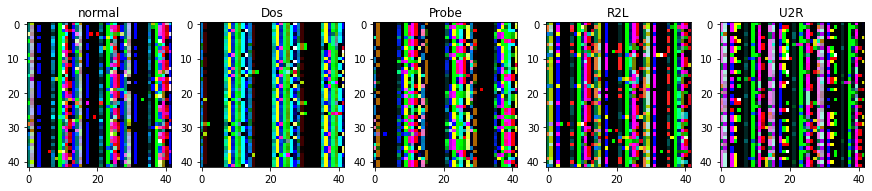

In [18]:
# Read the images for each category, the file name may vary (27.png, 83.png...)
# imgs = [Image.open('./train/{}/93.png'.format(i)) for i in range(len(dfs))]
imgs = list()
titles = list()
Train_Dir='./train/'
for dir in os.listdir(Train_Dir):
    img_files = os.listdir(os.path.join(Train_Dir, dir))
    if len(img_files) != 0: 
        imgs.append(Image.open(os.path.join(Train_Dir, dir, img_files[0])))
        titles.append(dir)

plot_row_num = (len(imgs)-1)//5+1
plt.figure(figsize=(15, plot_row_num*3)) 
for i in range(len(imgs)):
    plt.subplot(plot_row_num, 5, i+1)
    plt.imshow(imgs[i])
    plt.title(titles[i])

plt.show()  # display it

## Split the training and test set 

In [19]:
# Create folders to store images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

1116


In [20]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)//5 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)    
        if not os.path.exists(fpath):
            os.makedirs(fpath)               
        shutil.move(srcfile,dstfile)          
        #print ("move %s -> %s"%(srcfile,dstfile))

In [21]:
# The size of test set
Numbers

223

In [22]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [23]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [24]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [25]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing
